<a href="https://colab.research.google.com/github/Shabana25/hello-world/blob/readme/MINI_M2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Generic preamble
Sys.setenv(LANG = "en") # For english language
options(scipen = 5) # To deactivate annoying scientific number notation
set.seed(1337) # To have a seed defined for reproducability

### Knitr options
if (!require("knitr")) install.packages("knitr"); library(knitr) # For display of the markdown
knitr::opts_chunk$set(warning=FALSE,
                     message=FALSE,
                     fig.align="center"
                     )

### Install packages if necessary
if (!require("pacman")) install.packages("pacman") # package for loading and checking packages :)
pacman::p_load(tidyverse, # Standard datasciewnce toolkid (dplyr, ggplot2 et al.)
               magrittr, # For advanced piping (%>% et al.)
               igraph, # For network analysis
               tidygraph, # For tidy-style graph manipulation
               ggraph, # For ggplot2 style graph plotting
               Matrix, # For some matrix functionality
               ggforce # Awesome plotting
               
               )

Loading required package: knitr
Loading required package: pacman
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

igraph installed
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

tidygraph installed
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘farver’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘graphlayouts’


ggraph installed


In [2]:
install.packages("tidyverse")
library(tidyverse)
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


## 1. Create a network

Loading the dataset which includes 4 files. 

In [3]:
pacman::p_load(data.table)
data1 = fread("https://raw.githubusercontent.com/SDS-AAU/M2-2019/master/notebooks/assignments/assignment_1/data/Krack-High-Tec-Attributes.csv") %>% as_tibble() 
data2 = fread("https://raw.githubusercontent.com/SDS-AAU/M2-2019/master/notebooks/assignments/assignment_1/data/Krack-High-Tec-edgelist-Advice.txt") %>% as.matrix() 
data3 = fread("https://raw.githubusercontent.com/SDS-AAU/M2-2019/master/notebooks/assignments/assignment_1/data/Krack-High-Tec-edgelist-Friendship.txt") %>% as.matrix() 
data4 = fread("https://raw.githubusercontent.com/SDS-AAU/M2-2019/master/notebooks/assignments/assignment_1/data/Krack-High-Tec-edgelist-ReportsTo.txt") %>% as.matrix() 

#make surtain that only the observations with an active link is included
data2 = subset(data2, data2[,3]==1)
data3 = subset(data3, data3[,3]==1)
data4 = subset(data4, data4[,3]==1)

dimnames(data2) = list(c(1:nrow(data2)), c(1:ncol(data2)))
dimnames(data3) = list(c(1:nrow(data3)), c(1:ncol(data3)))
dimnames(data4) = list(c(1:nrow(data4)), c(1:ncol(data4)))



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

data.table installed


In [4]:
data1 %>% head()
data2 %>% head()
data3 %>% head()
data4 %>% head()

data1 %>% glimpse()
data2 %>% glimpse()
data3 %>% glimpse()
data14 %>% glimpse()

ID,AGE,TENURE,LEVEL,DEPT
<int>,<int>,<dbl>,<int>,<int>
1,33,9.333,3,4
2,42,19.583,2,4
3,40,12.750,3,2
4,33,7.500,3,4
5,32,3.333,3,2
6,59,28.000,3,1


1,2,3
1,2,1
1,4,1
1,8,1
1,16,1
1,18,1
1,21,1


1,2,3
1,2,1
1,4,1
1,8,1
1,12,1
1,16,1
2,1,1


1,2,3
1,2,1
2,7,1
3,14,1
4,2,1
5,14,1
6,21,1


Observations: 21
Variables: 5
$ ID     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…
$ AGE    <int> 33, 42, 40, 33, 32, 59, 55, 34, 62, 37, 46, 34, 48, 43, 40, 27…
$ TENURE <dbl> 9.333, 19.583, 12.750, 7.500, 3.333, 28.000, 30.000, 11.333, 5…
$ LEVEL  <int> 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2
$ DEPT   <int> 4, 4, 2, 4, 2, 1, 0, 1, 2, 3, 3, 1, 2, 2, 2, 4, 1, 3, 2, 2, 1
 int [1:190, 1:3] 1 1 1 1 1 1 2 2 2 3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:190] "1" "2" "3" "4" ...
  ..$ : chr [1:3] "1" "2" "3"
 int [1:102, 1:3] 1 1 1 1 1 2 2 2 3 3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:102] "1" "2" "3" "4" ...
  ..$ : chr [1:3] "1" "2" "3"


ERROR: ignored

### Generate network objects for the companies organizational structure (reports to), friendship, advice






In [0]:
dadvice <- graph_from_data_frame(d = data2, vertices = data1, directed = TRUE) %>% as_tbl_graph() %E>% mutate(type = "advice") 
dfriendship <- graph_from_data_frame(d = data3, vertices = data1, directed = TRUE)%>% as_tbl_graph() %E>% mutate(type = "friendship")
dreportsto <- graph_from_data_frame(d = data4, vertices = data1, directed = TRUE)%>% as_tbl_graph() %E>% mutate(type = "reportsto")



In [6]:
dadvice
dfriendship
dreportsto

# A tbl_graph: 21 nodes and 190 edges
#
# A directed simple graph with 1 component
#
# Edge Data: 190 x 4 (active)
   from    to   `3` type  
  <int> <int> <int> <chr> 
1     1     2     1 advice
2     1     4     1 advice
3     1     8     1 advice
4     1    16     1 advice
5     1    18     1 advice
6     1    21     1 advice
# … with 184 more rows
#
# Node Data: 21 x 5
  name    AGE TENURE LEVEL  DEPT
  <chr> <int>  <dbl> <int> <int>
1 1        33   9.33     3     4
2 2        42  19.6      2     4
3 3        40  12.8      3     2
# … with 18 more rows

# A tbl_graph: 21 nodes and 102 edges
#
# A directed simple graph with 1 component
#
# Edge Data: 102 x 4 (active)
   from    to   `3` type      
  <int> <int> <int> <chr>     
1     1     2     1 friendship
2     1     4     1 friendship
3     1     8     1 friendship
4     1    12     1 friendship
5     1    16     1 friendship
6     2     1     1 friendship
# … with 96 more rows
#
# Node Data: 21 x 5
  name    AGE TENURE LEVEL  DEPT
  <chr> <int>  <dbl> <int> <int>
1 1        33   9.33     3     4
2 2        42  19.6      2     4
3 3        40  12.8      3     2
# … with 18 more rows

# A tbl_graph: 21 nodes and 20 edges
#
# A rooted tree
#
# Edge Data: 20 x 4 (active)
   from    to   `3` type     
  <int> <int> <int> <chr>    
1     1     2     1 reportsto
2     2     7     1 reportsto
3     3    14     1 reportsto
4     4     2     1 reportsto
5     5    14     1 reportsto
6     6    21     1 reportsto
# … with 14 more rows
#
# Node Data: 21 x 5
  name    AGE TENURE LEVEL  DEPT
  <chr> <int>  <dbl> <int> <int>
1 1        33   9.33     3     4
2 2        42  19.6      2     4
3 3        40  12.8      3     2
# … with 18 more rows

We use graph_from_data_frame to create a igraph object. 
The graph first and foremost tells what type of graph it is = UN (undirected). 
The node attributes is "name", "age", "tenure", "level" and "dept". 
Then the plot function is used to show how the relationship between the network looks like. 

In [0]:
plot(dadvice)
plot(dfriendship)
plot(dreportsto)

### This networks are generated from the corresponding edgelists

In [8]:
dadvice %<>% as_tbl_graph()
dfriendship %<>% as_tbl_graph()
dreportsto %<>% as_tbl_graph()

dadvice
dfriendship
dreportsto

# A tbl_graph: 21 nodes and 190 edges
#
# A directed simple graph with 1 component
#
# Edge Data: 190 x 4 (active)
   from    to   `3` type  
  <int> <int> <int> <chr> 
1     1     2     1 advice
2     1     4     1 advice
3     1     8     1 advice
4     1    16     1 advice
5     1    18     1 advice
6     1    21     1 advice
# … with 184 more rows
#
# Node Data: 21 x 5
  name    AGE TENURE LEVEL  DEPT
  <chr> <int>  <dbl> <int> <int>
1 1        33   9.33     3     4
2 2        42  19.6      2     4
3 3        40  12.8      3     2
# … with 18 more rows

# A tbl_graph: 21 nodes and 102 edges
#
# A directed simple graph with 1 component
#
# Edge Data: 102 x 4 (active)
   from    to   `3` type      
  <int> <int> <int> <chr>     
1     1     2     1 friendship
2     1     4     1 friendship
3     1     8     1 friendship
4     1    12     1 friendship
5     1    16     1 friendship
6     2     1     1 friendship
# … with 96 more rows
#
# Node Data: 21 x 5
  name    AGE TENURE LEVEL  DEPT
  <chr> <int>  <dbl> <int> <int>
1 1        33   9.33     3     4
2 2        42  19.6      2     4
3 3        40  12.8      3     2
# … with 18 more rows

# A tbl_graph: 21 nodes and 20 edges
#
# A rooted tree
#
# Edge Data: 20 x 4 (active)
   from    to   `3` type     
  <int> <int> <int> <chr>    
1     1     2     1 reportsto
2     2     7     1 reportsto
3     3    14     1 reportsto
4     4     2     1 reportsto
5     5    14     1 reportsto
6     6    21     1 reportsto
# … with 14 more rows
#
# Node Data: 21 x 5
  name    AGE TENURE LEVEL  DEPT
  <chr> <int>  <dbl> <int> <int>
1 1        33   9.33     3     4
2 2        42  19.6      2     4
3 3        40  12.8      3     2
# … with 18 more rows

We here use as.tbl.graph() to get more intuitive representation og the datastructure. This shows how many nodes and edges there is. 

In [0]:
dadvice <- tbl_graph(edges = data2, nodes = data1, directed = FALSE)
V(dadvice)


## 2. Analysis 



### A - Network level characteristics
### Find the overal network level of:
### - Density
### - Transistivity
### - Reciprocity

In [10]:
# Get density of a graph
edge_density(dadvice)

# Transistivity
transitivity(dadvice, type ="global")

# reciprocity
reciprocity(dadvice)

[1] 0.452381

[1] 0.7345088

[1] 0.4736842

In [11]:
# Get density of a graph
edge_density(dfriendship)
# Transistivity
transitivity(dfriendship, type="global")
# reciprocity
reciprocity(dfriendship)




[1] 0.2428571

[1] 0.4714946

[1] 0.4509804

In [12]:
# Get density of a graph
edge_density(dreportsto)
# Transistivity
transitivity(dreportsto)
# reciprocity
reciprocity(dreportsto)




[1] 0.04761905

[1] 0

[1] 0

Transistivity shows how much the network is connected to each other.
Transitivity of a relation means that when there is a tie fro a to b, then there is also a tie from b to c and last a tie from c to a.  
Its like friends of my friends are my friends. 
Next step is to interpret the results. 

---



In [13]:
g = dadvice %>% graph_join(dreportsto, by = "name") %>% graph_join(dfriendship,by="name")
g

# A tbl_graph: 21 nodes and 312 edges
#
# A directed multigraph with 1 component
#
# Edge Data: 312 x 4 (active)
   from    to   `3` type  
  <int> <int> <int> <chr> 
1     1     2     1 advice
2     1     4     1 advice
3     1     8     1 advice
4     1    16     1 advice
5     1    18     1 advice
6     1    21     1 advice
# … with 306 more rows
#
# Node Data: 21 x 13
  name  AGE.x TENURE.x LEVEL.x DEPT.x AGE.y TENURE.y LEVEL.y DEPT.y   AGE TENURE
  <chr> <int>    <dbl>   <int>  <int> <int>    <dbl>   <int>  <int> <int>  <dbl>
1 1        33     9.33       3      4    33     9.33       3      4    33   9.33
2 2        42    19.6        2      4    42    19.6        2      4    42  19.6 
3 3        40    12.8        3      2    40    12.8        3      2    40  12.8 
# … with 18 more rows, and 2 more variables: LEVEL <int>, DEPT <int>

In [14]:
edge_density(g)
reciprocity(g)
transitivity(g)

[1] 0.7428571

[1] 0.525641

[1] 0.7863578

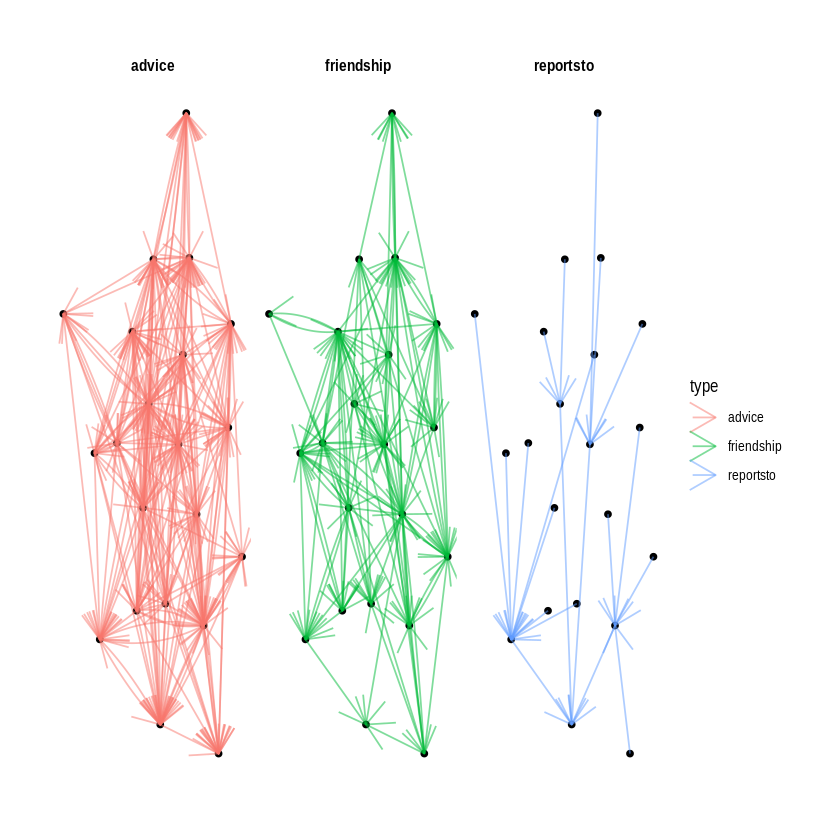

In [15]:
g %>%
  ggraph(layout = "nicely") +
  geom_node_point() +
  geom_edge_fan(aes(col = type), arrow = arrow(), alpha = 0.5) +
  theme_graph() +
  facet_edges(~type)

Now we have joined the networks

In [0]:
plot(g,
     layout= layout_with_fr(g),
     vertex.label = degree(g, mode = "in"),
     vertex.size = 1+ sqrt(degree(g, mode = "in")),
     vertex.color = as.numeric(factor(V(g)$office)),
     vertex.label = NA,
     edge.arrow.size = 0.5)

### Answer the following questions:

- Are relationships like friendship and advice giving usually reciprocal?
- Are friends of your friends also your friends?
- Are the employees generally more likely to be in a friendship or advice-seeking relationship?


If you take a point of departure in the advice, the density is high. This means that employees are willing to seek advice from their colleagues. If, on the other hand, the reciprocity is based on reciprocity, it appears that colleagues seek advice from those who send them for advice. If we start from all three, then the chance is that an employee is in a friendship or is seeking a friendship with advice high. 


## B: Node level characteristics


### - Who is most popular in the networks.Who is the most wanted friend, and advice giver?
### - Are managers in higher hirarchy more popular as friend, and advice giver?

In our case our object is a directed graph, which means that each edge has a direction and degree of a node is further divided into In-degree and Out-degree. In-degree refers to the number of edges/connections incident on it and Out-degree refers to the number of edges/connections from it to other nodes.
Centrality are found in tree different ways. Degree centrality, eigen - centrality and betweenness centrality. 
- degree centrality define the importance of a node in a graph. The higher the degree of a node, the important it is in a graph.
- Eigenvector centrality measure the importance of a node as a function of the importance of its neighbors. It means, if a node is connectted to a node which is highly important, then is will have a high Eigenvector score - compore to a node which is less important. 
- Betweenness defines and measures the importance of a node based on how many times it show in the shortest in a graph.


In [17]:
dadvice <- dadvice %N>%
  mutate(centrality_dgr = centrality_degree(),
         centrality_eigen = centrality_eigen(),
         centrality_between = centrality_betweenness())

dadvice %N>%
  as_tibble() %>%
  arrange(desc(centrality_dgr)) %>%
  head()

dadvice %N>%
  as_tibble() %>%
  arrange(desc(centrality_eigen)) %>%
  head() 

dadvice %N>%
  as_tibble() %>%
  arrange(desc(centrality_between)) %>%
  head() 



name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
15,40,8.417,3,2,20,0.7527869,6.132540
18,33,9.083,2,3,17,1.0000000,88.916667
3,40,12.750,3,2,15,0.6639912,6.604762
5,32,3.333,3,2,15,0.6322213,5.078571
10,37,9.250,3,3,14,0.7401911,18.296825
9,62,5.417,3,2,13,0.5373671,3.953968


name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
18,33,9.083,2,3,17,1.0000000,88.916667
21,36,12.500,2,1,11,0.8073162,60.126984
15,40,8.417,3,2,20,0.7527869,6.132540
10,37,9.250,3,3,14,0.7401911,18.296825
2,42,19.583,2,4,3,0.6652909,5.935714
3,40,12.750,3,2,15,0.6639912,6.604762


name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
18,33,9.083,2,3,17,1.0000000,88.91667
21,36,12.500,2,1,11,0.8073162,60.12698
7,55,30.000,1,0,8,0.6471430,27.62460
10,37,9.250,3,3,14,0.7401911,18.29683
1,33,9.333,3,4,6,0.6226206,13.74683
4,33,7.500,3,4,12,0.6625419,13.70873


We can conclude that the number 15 is the popular one as people seed advice. But Eigenvector and betweenness surgest that it is number 18 who is the most popular advice giver, because both eigen score and betweeness is high.  



In [18]:
dfriendship <- dfriendship %N>%
  mutate(centrality_dgr = centrality_degree(),
         centrality_eigen = centrality_eigen(),
         centrality_between = centrality_betweenness())

dfriendship %N>%
  as_tibble() %>%
  arrange(desc(centrality_dgr)) %>%
  head() 

dfriendship %N>%
  as_tibble() %>%
  arrange(desc(centrality_eigen)) %>%
  head() 

dfriendship %N>%
  as_tibble() %>%
  arrange(desc(centrality_between)) %>%
  head() 



name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
17,30,12.417,3,1,18,1.0000000,134.43333
11,46,27.000,3,3,13,0.8468126,58.45000
19,32,4.833,3,2,9,0.6952601,21.88333
15,40,8.417,3,2,8,0.5910544,22.56667
5,32,3.333,3,2,7,0.6558157,17.41667
10,37,9.250,3,3,7,0.3210385,0.00000


name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
17,30,12.417,3,1,18,1.0000000,134.43333
11,46,27.000,3,3,13,0.8468126,58.45000
19,32,4.833,3,2,9,0.6952601,21.88333
5,32,3.333,3,2,7,0.6558157,17.41667
1,33,9.333,3,4,5,0.6375787,29.06667
12,34,8.917,3,1,4,0.6328913,19.65833


name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
17,30,12.417,3,1,18,1.0000000,134.43333
11,46,27.000,3,3,13,0.8468126,58.45000
21,36,12.500,2,1,4,0.4752042,33.91667
2,42,19.583,2,4,3,0.5938854,33.48333
4,33,7.500,3,4,6,0.5761195,31.66667
1,33,9.333,3,4,5,0.6375787,29.06667


 This time all tree measures agree that person 17 is the most popular person with freindship.   

In [19]:
dreportsto <- dreportsto %N>%
  mutate(centrality_dgr = centrality_degree(),
         centrality_eigen = centrality_eigen(),
         centrality_between = centrality_betweenness())

dreportsto %N>%
  as_tibble() %>%
  arrange(desc(centrality_dgr)) %>%
  head() 

dreportsto %N>%
  as_tibble() %>%
  arrange(desc(centrality_eigen)) %>%
  head() 

dreportsto %N>%
  as_tibble() %>%
  arrange(desc(centrality_between)) %>%
  head() 

name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,33,9.333,3,4,1,0.1119843,0
2,42,19.583,2,4,1,0.3364844,3
3,40,12.750,3,2,1,0.3328069,0
4,33,7.500,3,4,1,0.1119843,0
5,32,3.333,3,2,1,0.3328069,0
6,59,28.000,3,1,1,0.1342543,0


name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
14,43,10.417,2,2,1,1.0000000,7
7,55,30.000,1,0,0,0.6750970,0
21,36,12.500,2,1,1,0.4034000,4
2,42,19.583,2,4,1,0.3364844,3
19,32,4.833,3,2,1,0.3328069,0
20,38,11.667,3,2,1,0.3328069,0


name,AGE,TENURE,LEVEL,DEPT,centrality_dgr,centrality_eigen,centrality_between
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
14,43,10.417,2,2,1,1.0000000,7
21,36,12.500,2,1,1,0.4034000,4
2,42,19.583,2,4,1,0.3364844,3
18,33,9.083,2,3,1,0.2886101,2
1,33,9.333,3,4,1,0.1119843,0
3,40,12.750,3,2,1,0.3328069,0


Number 14 seems to be the most important in the leadership.

## C: Relational Characteristics

### - Are managers from the same 1. department, or on the same 2. hirarchy, 3. age, or 4. tenuere more likely to become friends or give advice? (hint: assortiativity related)
### - Are friends more likely to give each others advice?

In [26]:
assortativity(dadvice, V(dadvice)$DEPT, directed = TRUE)
assortativity(dfriendship, V(dfriendship)$DEPT, directed = TRUE)
assortativity(dreportsto, V(dreportsto)$DEPT, directed = TRUE)


assortativity(dadvice, V(dadvice)$TENURE, directed = TRUE)


[1] 0.1075871

[1] 0.1511577

[1] 0.559884

[1] 0.1552188

When we make a assortativity function, then it measure how preferentially attached vertices are to other vertices with identical attributes.

## 3. Aggregated Networks


### Reconstruct the advice and friendship network on the aggregated level of departments, where nodes represent departments and edges the number of cross departmental friendships/advice relationships.

## 4. Visualization



### Everything goes. Show us some pretty and informative plots. Choose what to plot, and how, on your own. Interpret the results and share some insights.